In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.special import softmax
from tqdm import trange


In [2]:
# generate random expert selection data
np.random.seed(0)
n_experts = 8
top_k = 2

def get_n_active_experts(bs, n_experts, top_k):
    expert_selection = np.random.rand(bs, n_experts)
    expert_selection = softmax(expert_selection, axis=1)
    expert_selection = np.argsort(expert_selection, axis=1)
    expert_selection = expert_selection[:, -top_k:]
    return len(np.unique(expert_selection))

In [8]:
bses = []
n_active_experts = []
for bs in [1, 2, 4, 8, 16, 32, 64, 128]:
    avg_n_active_experts = np.mean([get_n_active_experts(bs, n_experts, top_k) for _ in range(10000)])
    bses.append(bs)
    n_active_experts.append(avg_n_active_experts)

In [9]:
n_active_experts

[2.0, 3.5088, 5.4684, 7.1993, 7.9142, 7.9992, 8.0, 8.0]

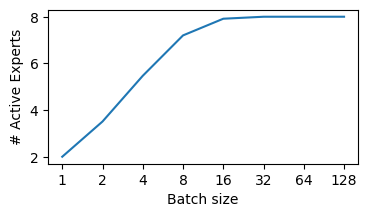

In [22]:
df = pd.DataFrame({'Batch size': bses, '# Active Experts': n_active_experts})
df["Batch size"] = pd.Categorical(df["Batch size"], categories=bses)
fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax = sns.lineplot(data=df, x='Batch size', y='# Active Experts', ax=ax)
ax.set_xscale('log', base=2)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
ax.xaxis.set_major_locator(ticker.LogLocator(base=2.0, numticks=12))

In [23]:
fig.savefig('active_experts_vs_batch_size.png', bbox_inches='tight')